In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 11 12:29:48 2019

@author: SLab"
"""
import tensorflow as tf
import keras.callbacks
from keras.layers import Input, Lambda, Dense
from keras.models import Model
import keras.backend as K
#import sys
import os
import pandas
from keras import backend as K
from keras.utils.vis_utils import plot_model
from keras import optimizers
from keras.models import Sequential
from keras.layers import  Dropout
#import keras
from scipy import interp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.utils import plot_model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from subprocess import check_output
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
#from sklearn import cross_validation

import os, re, csv, math, codecs
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
import time
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

In [ ]:
# ==============================================================================
class Metrics(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.confusion = []
        self.precision = []
        self.recall = []
        self.f1s = []
        self.kappa = []
        self.auc = []

    def on_epoch_end(self, epoch, logs={}):
      score = np.asarray(self.model.predict(self.validation_data[0]))
      predict = np.round(np.asarray(self.model.predict(self.validation_data[0])))
      predict2 = np.asarray(self.model.predict(self.validation_data[0]))
      print("#######y_predict2s#####")
      print(predict2)
      print("#######y_predict#####")
      print(predict)
      targ = self.validation_data[1]
      print("#######targ#####")
      print(targ)
      y_test_non_category = [ np.argmax(t) for t in targ ]
      y_predict_non_category = [ np.argmax(t) for t in predict ]
      y_predict_non_category2 = [ np.amax(t) for t in predict2 ]
      print("#######y_predict_non_category2#####")
      print(y_predict_non_category2)
      print("#######y_test_non_category#####")
      print(y_test_non_category)
      conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)
      print("########confusion_matrics########")
      print(conf_mat)
        #self.auc.append(sklm.roc_auc_score(targ, score))
#==============================================================================
#       self.confusion.append(confusion_matrix(y_test_non_category, y_predict_non_category))
#       print("confusion_matrics 2")
#       print(self.confusion)
#       
#==============================================================================
      report = classification_report(y_test_non_category,  y_predict_non_category, target_names=label_names)
      print("########classification report########")
      print(report) 
      
      # false positive rate and true positive rate
      fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_non_category,  y_predict_non_category)
      auc_keras = auc(fpr_keras, tpr_keras)
      print("########ROC##########")
      print(auc_keras) 
      #self.classification_report.append(classification_report(y_test_non_category,  y_predict_non_category, target_names=label_names))
      self.precision.append(precision_score(y_test_non_category, y_predict_non_category,average='weighted'))
      self.recall.append(recall_score(y_test_non_category, y_predict_non_category,average='weighted'))
      #auc_PRC = auc(self.recall, self.precision)
#==============================================================================
      precision1, recall1, thresholds1 = precision_recall_curve(y_test_non_category, y_predict_non_category)
      print("########PRC##########")
      auc_PRC= auc(recall1, precision1)
      print(auc_PRC)
#==============================================================================
 # Compute ROC curve and ROC area for each class
      fpr = dict()
      tpr = dict()
      roc_auc = dict()
      n_classes=2
      for i in range(n_classes):
          fpr[i], tpr[i], _ = roc_curve(targ[:, i], predict[:, i])
          roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
      fpr["micro"], tpr["micro"], _ = roc_curve(targ.ravel(), predict.ravel())
      roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
      all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
      mean_tpr = np.zeros_like(all_fpr)
      for i in range(n_classes):
          mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
      mean_tpr /= n_classes

      fpr["macro"] = all_fpr
      tpr["macro"] = mean_tpr
      roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
      print("########ROC_MAC##########")
      print(roc_auc) 
      n_classes=2
      precision = dict()
      recall = dict()
      average_precision = dict()
      for i in range(n_classes):
            precision[i], recall[i], _ = precision_recall_curve(targ[:, i],
                                                                predict[:, i])
            average_precision[i] = average_precision_score(targ[:, i], predict[:, i])
        
        # A "micro-average": quantifying score on all classes jointly
      precision["micro"], recall["micro"], _ = precision_recall_curve(targ.ravel(),
            predict.ravel())
      average_precision["macro"] = average_precision_score(targ, predict,
                                                             average="macro")
      average_precision["micro"] = average_precision_score(targ, predict,
                                                             average="micro")
      average_precision["weighted"] = average_precision_score(targ, predict,
                                                             average="weighted")
      print('Average precision score, Macro-averaged over all classes: {0:0.5f}' .format(average_precision["macro"]))
      print('Average precision score, Micro-averaged over all classes: {0:0.5f}' .format(average_precision["micro"]))
      print('Average precision score, Weighted-averaged over all classes: {0:0.5f}' .format(average_precision["weighted"]))
      
      return
# ==============================================================================


# Helping Functions

In [ ]:
def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall))

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc


from sklearn.metrics import roc_auc_score
def auroc(y_true, y_pred):
    return roc_auc_score(y_true, y_pred)

# auc = roc_auc_score(testy, yhat_probs)

from sklearn.metrics import cohen_kappa_score
def kappa(y_true, y_pred):
    cohen_kappa_score(y_true, y_pred)


# Training

Getting Stopwords from NLTK library

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Setting Data Directory

In [ ]:
data_dir = '/content/drive/My Drive/Thesis'

Defining focalloss and keras call back for loss history and time hostory

In [ ]:
sns.set_style("whitegrid")
np.random.seed(0)

#DATA_PATH = '../input/'
#EMBEDDING_DIR = '../input/'

MAX_NB_WORDS = 100000
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", ':', ';', '(', ')', '[', ']', '{', '}'])

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracies = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracies.append(logs.get('acc'))
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

def focal_loss(y_true, y_pred):
    gamma = 1.0 
    alpha = 0.25
    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
    return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))


#print(check_output(["ls", "../input"]).decode("utf8"))
#print(check_output(["ls", "../input"]).decode("utf8"))


Setting Train and Test dataframes

In [ ]:
train_df = pd.read_csv(data_dir + '/Data/Thesis_ACA_citation_data' + '/final_data_citations_M_train.csv', sep=',', header=0,encoding = "ISO-8859-1")
test_df = pd.read_csv(data_dir + '/Data/Thesis_ACA_citation_data' + '/final_data_citations_M_test.csv', sep=',', header=0,encoding = "ISO-8859-1")
test_df = test_df.fillna('_NA_')

print("num train: ", train_df.shape[0])
print("num test: ", test_df.shape[0])

label_names = ["background", "compareorcontrast","extends","uses","motivation","future","none"]
y_train = train_df[label_names].values


num train:  8518
num test:  999


Visualizing Words Distribution

####################################################
219
####################################################


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


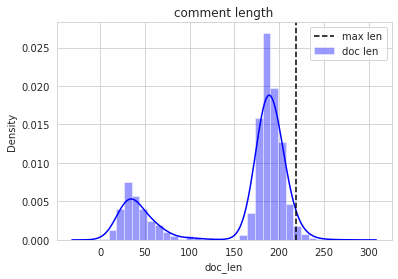

In [ ]:
#visualize word distribution
train_df['doc_len'] = train_df['text'].apply(lambda words: len(words.split(" ")))
max_seq_len = np.round(train_df['doc_len'].mean() + train_df['doc_len'].std()).astype(int)

print("####################################################")
print(max_seq_len)
#==============================================================================
sns.distplot(train_df['doc_len'], hist=True, kde=True, color='b', label='doc len')
print("####################################################")
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('comment length'); plt.legend()
plt.show()
#==============================================================================

In [ ]:
import re
from tqdm import tqdm_notebook

from nltk.corpus import stopwords

from tensorflow.keras import regularizers, initializers, optimizers, callbacks
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

MAX_NB_WORDS = 100000    # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = max_seq_len # max length of each entry (sentence), including padding
VALIDATION_SPLIT = 0.2   # data for validation (not used in training)
EMBEDDING_DIM = 300      # embedding dimensions for word vectors (word2vec/GloVe)
GLOVE_DIR = "/content/drive/My Drive/Thesis/Embeddings/glove.6B."+str(EMBEDDING_DIM)+"d.txt"


In [ ]:
raw_docs_train = train_df['text'].tolist()
raw_docs_test = test_df['text'].tolist() 
num_classes = len(label_names)

In [ ]:
print("pre-processing train data...")
processed_docs_train = []
for doc in tqdm(raw_docs_train):
    tokens = tokenizer.tokenize(doc)
    filtered = [word for word in tokens if word not in stop_words]
    processed_docs_train.append(" ".join(filtered))
#end for

processed_docs_test = []
for doc in tqdm(raw_docs_test):
    tokens = tokenizer.tokenize(doc)
    filtered = [word for word in tokens if word not in stop_words]
    processed_docs_test.append(" ".join(filtered))
#end for

 16%|█▌        | 1383/8518 [00:00<00:00, 13822.30it/s]

pre-processing train data...


100%|██████████| 999/999 [00:00<00:00, 64108.17it/s]


In [ ]:
print("tokenizing input data...")
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True, char_level=False)
tokenizer.fit_on_texts(processed_docs_train + processed_docs_test)  #leaky
word_seq_train = tokenizer.texts_to_sequences(processed_docs_train)
word_seq_test = tokenizer.texts_to_sequences(processed_docs_test)
word_index = tokenizer.word_index
print("Vocabulary size: ", len(word_index))

tokenizing input data...
Vocabulary size:  25516


In [ ]:
#pad sequences
word_seq_train = sequence.pad_sequences(word_seq_train, maxlen=max_seq_len)
word_seq_test = sequence.pad_sequences(word_seq_test, maxlen=max_seq_len)


In [ ]:
print('Shape of data tensor:', word_seq_train.shape)
print('Shape of label tensor:', y_train.shape)

Shape of data tensor: (8518, 219)
Shape of label tensor: (8518, 7)


In [ ]:
random_state = np.random.RandomState(0)
X_train, X_test, Y_train, Y_test = train_test_split(word_seq_train, y_train, test_size=.2,random_state=random_state)


In [ ]:
print('Number of entries in each category:')
print('training: ', Y_train.sum(axis=0))
print('validation: ', Y_test.sum(axis=0))

Number of entries in each category:
training:  [1930  553  122  513  128   62 3506]
validation:  [481 154  29 159  38  11 832]


In [ ]:
embeddings_index = {}
f = open(GLOVE_DIR)
print('Loading GloVe from:', GLOVE_DIR,'...', end='')
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\n Proceeding with Embedding Matrix...", end="")

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print(" Completed!")

Loading GloVe from: /content/drive/My Drive/Thesis/Embeddings/glove.6B.300d.txt ...Done.
 Proceeding with Embedding Matrix... Completed!


In [ ]:
adam = optimizers.Adam(lr=0.001)
history = LossHistory()
time_callback = TimeHistory()

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_layer = Embedding(len(word_index) + 1,
                           EMBEDDING_DIM,
                           weights = [embedding_matrix],
                           input_length = MAX_SEQUENCE_LENGTH,
                           trainable=False,
                           name = 'embeddings')
embedded_sequences = embedding_layer(sequence_input)
x = LSTM(60, return_sequences=True,name='lstm_layer')(embedded_sequences)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
preds = Dense(num_classes, activation="sigmoid")(x)

In [ ]:
model = Model(sequence_input, preds)
model.compile(loss=[focal_loss], optimizer=adam, metrics=['accuracy',precision,recall,f1])


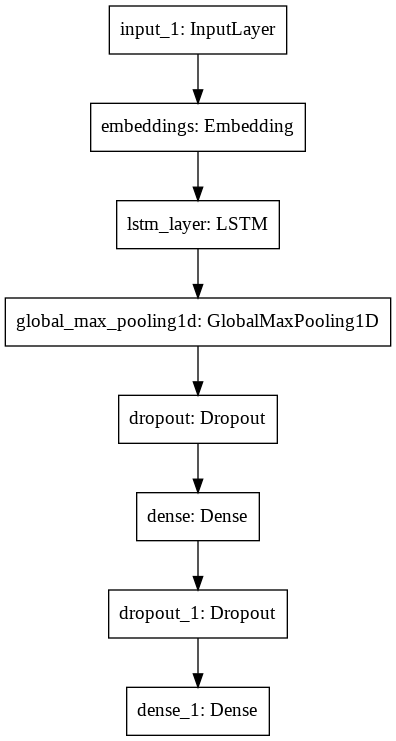

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list = [early_stopping]

In [ ]:
pandas.DataFrame( model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                                  batch_size=250, epochs=100, shuffle=True, verbose=2, callbacks=[history,time_callback]).history).to_csv(data_dir+"/FullData-focalloss-_M_adam_0.001_GloVe.csv")


Epoch 1/100
28/28 - 23s - loss: 156.5666 - accuracy: 0.4315 - precision: 0.4498 - recall: 0.0756 - f1: 0.1047 - val_loss: 89.4340 - val_accuracy: 0.6203 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: nan
Epoch 2/100
28/28 - 20s - loss: 91.9867 - accuracy: 0.6335 - precision: 0.6939 - recall: 0.1868 - f1: 0.2927 - val_loss: 84.0128 - val_accuracy: 0.6520 - val_precision: 0.8286 - val_recall: 0.0199 - val_f1: 0.0389
Epoch 3/100
28/28 - 20s - loss: 89.0639 - accuracy: 0.6525 - precision: 0.7047 - recall: 0.2131 - f1: 0.3264 - val_loss: 83.0485 - val_accuracy: 0.6526 - val_precision: 0.7635 - val_recall: 0.0628 - val_f1: 0.1158
Epoch 4/100
28/28 - 21s - loss: 87.3441 - accuracy: 0.6585 - precision: 0.7232 - recall: 0.2123 - f1: 0.3271 - val_loss: 82.2873 - val_accuracy: 0.6526 - val_precision: 0.7751 - val_recall: 0.1182 - val_f1: 0.2047
Epoch 5/100
28/28 - 20s - loss: 85.5766 - accuracy: 0.6632 - precision: 0.7432 - recall: 0.2392 - f1: 0.3598 - val_loss: 82.0810 - val_acc

In [ ]:
print("FullData-focalloss-Citation_M done")

FullData-focalloss-Citation_M done


## Comparing Results for GloVe and FastText embedding

In [ ]:
glove_results = pd.read_csv(data_dir+"/FullData-focalloss-_M_adam_0.001_GloVe.csv")

In [ ]:
fasttext_results = pd.read_csv(data_dir+"/FullData-focalloss-_M_adam_0.001_FastText.csv")

### For Training Data

####################################################


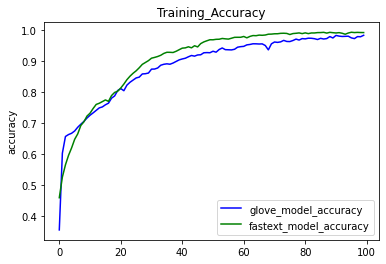

In [ ]:
#==============================================================================
sns.lineplot(data=glove_results['accuracy'], color='b', label='glove_model_accuracy')
sns.lineplot(data=fasttext_results['accuracy'], color='g', label='fastext_model_accuracy')
print("####################################################")
# plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('Training_Accuracy')
plt.legend()
plt.savefig('train_Acc.png', dpi=300, bbox_inches='tight')
plt.show()
#==============================================================================

####################################################


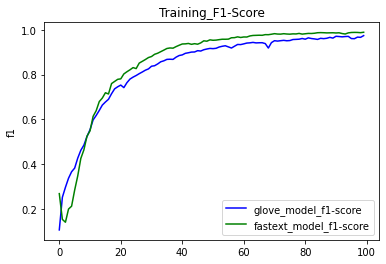

In [ ]:
#==============================================================================
sns.lineplot(data=glove_results['f1'], color='b', label='glove_model_f1-score')
sns.lineplot(data=fasttext_results['f1'], color='g', label='fastext_model_f1-score')
print("####################################################")
# plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('Training_F1-Score')
plt.legend()
plt.savefig('train_F1-score.png', dpi=300, bbox_inches='tight')
plt.show()
#==============================================================================

####################################################


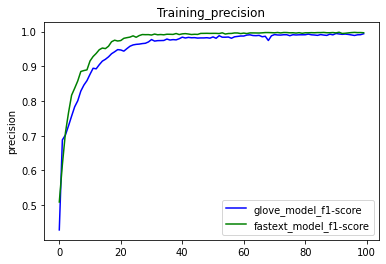

In [ ]:
#==============================================================================
sns.lineplot(data=glove_results['precision'], color='b', label='glove_model_f1-score')
sns.lineplot(data=fasttext_results['precision'], color='g', label='fastext_model_f1-score')
print("####################################################")
# plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('Training_precision')
plt.legend()
plt.savefig('train_Precision.png', dpi=300, bbox_inches='tight')
plt.show()
#==============================================================================

####################################################


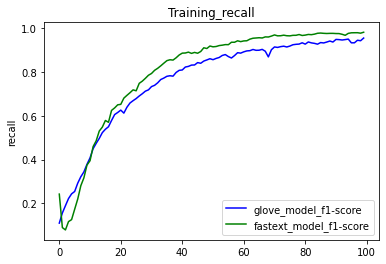

In [ ]:
#==============================================================================
sns.lineplot(data=glove_results['recall'], color='b', label='glove_model_f1-score')
sns.lineplot(data=fasttext_results['recall'], color='g', label='fastext_model_f1-score')
print("####################################################")
# plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('Training_recall')
plt.legend()
plt.savefig('train_Recall.png', dpi=300, bbox_inches='tight')
plt.show()
#==============================================================================

### For Validation Data

####################################################


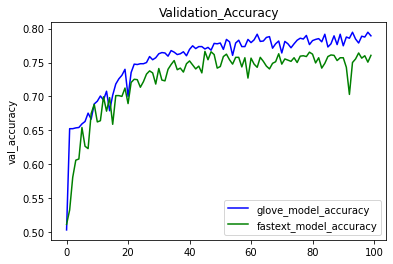

In [ ]:
#==============================================================================
sns.lineplot(data=glove_results['val_accuracy'], color='b', label='glove_model_accuracy')
sns.lineplot(data=fasttext_results['val_accuracy'], color='g', label='fastext_model_accuracy')
print("####################################################")
# plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('Validation_Accuracy')
plt.legend()
plt.savefig('val_Acc.png', dpi=300, bbox_inches='tight')
plt.show()
#==============================================================================

####################################################


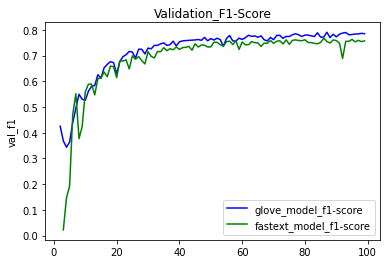

In [ ]:
#==============================================================================
sns.lineplot(data=glove_results['val_f1'], color='b', label='glove_model_f1-score')
sns.lineplot(data=fasttext_results['val_f1'], color='g', label='fastext_model_f1-score')
print("####################################################")
# plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('Validation_F1-Score')
plt.legend()
plt.savefig('val_F1-Score.png', dpi=300, bbox_inches='tight')
plt.show()
#==============================================================================

####################################################


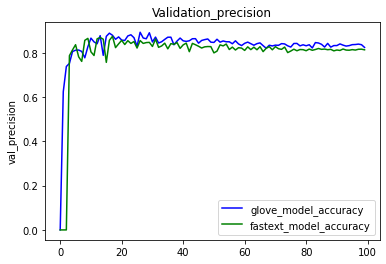

In [ ]:
#==============================================================================
sns.lineplot(data=glove_results['val_precision'], color='b', label='glove_model_accuracy')
sns.lineplot(data=fasttext_results['val_precision'], color='g', label='fastext_model_accuracy')
print("####################################################")
# plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('Validation_precision')
plt.legend()
plt.savefig('val_Precision.png', dpi=300, bbox_inches='tight')
plt.show()
#==============================================================================

####################################################


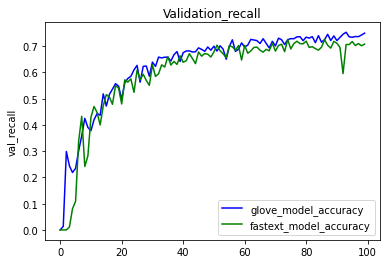

In [ ]:
#==============================================================================
sns.lineplot(data=glove_results['val_recall'], color='b', label='glove_model_accuracy')
sns.lineplot(data=fasttext_results['val_recall'], color='g', label='fastext_model_accuracy')
print("####################################################")
# plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('Validation_recall')
plt.legend()
plt.savefig('val_Recall.png', dpi=300, bbox_inches='tight')
plt.show()
#==============================================================================